In [1]:
import pandas as pd
mutex = pd.read_csv("mutex.csv", index_col=0, sep=',')
all_labels = mutex.columns
mutex


label:SLEEPING  label:LAB_WORK  label:IN_CLASS  \
label:SLEEPING                              0               1               1   
label:LAB_WORK                              1               0               0   
label:IN_CLASS                              1               0               0   
label:IN_A_MEETING                          1               1               1   
label:LOC_main_workplace                    0               0               0   
label:OR_indoors                            0               0               0   
label:OR_outside                            1               1               1   
label:IN_A_CAR                              1               1               1   
label:ON_A_BUS                              1               1               1   
label:DRIVE_-_I_M_THE_DRIVER                1               1               1   
label:DRIVE_-_I_M_A_PASSENGER               1               1               1   
label:LOC_home                              0               1               0   
label:FIX_restaurant                        1               1               1   
label:PHONE_IN_POCKET                       0               0               0   
label:OR_exercise                           1               1               1   
label:COOKING                               1               1               1   
label:SHOPPING                              1               1               1   
label:STROLLING                             1               1               1   
label:DRINKING__ALCOHOL_                    1               1               1   
label:BATHING_-_SHOWER                      1               1               1   
label:CLEANING                              1               1               1   
label:DOING_LAUNDRY                         1               1               1   
label:WASHING_DISHES                        1               1               1   
label:WATCHING_TV                           0               1               1   
label:SURFING_THE_INTERNET                  0               1               0   
label:AT_A_PARTY                            1               1               1   
label:AT_A_BAR                              1               1               1   
label:LOC_beach                             1               1               1   
label:SINGING                               1               1               1   
label:TALKING                               0               0               0   
label:COMPUTER_WORK                         0               0               0   
label:EATING                                0               1               1   
label:TOILET                                0               1               1   
label:GROOMING                              0               1               1   
label:DRESSING                              0               1               1   
label:AT_THE_GYM                            1               1               1   
label:STAIRS_-_GOING_UP                     1               1               1   
label:STAIRS_-_GOING_DOWN                   1               1               1   
label:ELEVATOR                              1               1               1   
label:AT_SCHOOL                             0               0               0   
label:PHONE_IN_HAND                         0               0               0   
label:PHONE_IN_BAG                          0               0               0   
label:PHONE_ON_TABLE                        0               0               0   
label:WITH_CO-WORKERS                       1               0               1   
label:WITH_FRIENDS                          0               1               0   

                               label:IN_A_MEETING  label:LOC_main_workplace  \
label:SLEEPING                                  1                         0   
label:LAB_WORK                                  1                         0   
label:IN_CLASS                                  1                  

In [4]:
import sys
sys.path.append("../../") # gruppe_3 als lib dir

# ----------------------------------------------------------------------------------------
# VORSICHT: Änderungen an gruppe_3 - Files erfordern womöglich einen Jupyter-Neustart
# ----------------------------------------------------------------------------------------

import os
from sklearn.model_selection import train_test_split
from gruppe_3.dataset import DatasetReader, InputMode

# ----------------------------------------------------------------------------------------
# werden die Parameter nach dem InputMode weggelassen, so werden alle Dateien im Ziel-
# verzeichnis gelesen. Letzteres wird durch eine Umgebungsvariable adressiert, damit
# alle entspannt ins Git pushen können.
# ----------------------------------------------------------------------------------------

dataset_reader = DatasetReader(
    os.environ.get('EXTRA_SENSORY_DATASET'),
    InputMode.users
)

X, y = dataset_reader.read()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


D:\Development\Projects\mustererkennung\data\00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv
D:\Development\Projects\mustererkennung\data\098A72A5-E3E5-4F54-A152-BBDA0DF7B694.features_labels.csv
D:\Development\Projects\mustererkennung\data\0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv
D:\Development\Projects\mustererkennung\data\0BFC35E2-4817-4865-BFA7-764742302A2D.features_labels.csv
D:\Development\Projects\mustererkennung\data\0E6184E1-90C0-48EE-B25A-F1ECB7B9714E.features_labels.csv
D:\Development\Projects\mustererkennung\data\1155FF54-63D3-4AB2-9863-8385D0BD0A13.features_labels.csv
D:\Development\Projects\mustererkennung\data\11B5EC4D-4133-4289-B475-4E737182A406.features_labels.csv
D:\Development\Projects\mustererkennung\data\136562B6-95B2-483D-88DC-065F28409FD2.features_labels.csv
D:\Development\Projects\mustererkennung\data\1538C99F-BA1E-4EFB-A949-6C7C47701B20.features_labels.csv
D:\Development\Projects\mustererkennung\data\1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842.

In [19]:
all_columns = y.columns

phone_labels = [l for l in all_columns if l.startswith("label:PHONE_")]

various_labels_a = ['label:SLEEPING', 'label:LAB_WORK', 'label:IN_A_MEETING', 'label:IN_A_CAR', 'label:FIX_restaurant', 'label:OR_exercise', 'label:COOKING', 'label:AT_A_PARTY', 'label:ELEVATOR']

various_labels_b = ['label:IN_CLASS', 'label:OR_outside', 'label:BATHING_-_SHOWER', 'label:DOING_LAUNDRY', 'label:AT_A_BAR', 'label:AT_THE_GYM']

multi_labels = [c for c in all_columns if c not in phone_labels and c not in various_labels_b and c not in various_labels_a]

from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier, Pool

cat_features = [X.columns.get_loc(f) for f in dataset_reader.discrete_group_names]
scores = []
for col in phone_labels:
    clf = CatBoostClassifier(
            verbose=200,
            task_type="GPU",
            iterations=1500,
            depth = 6,
            random_state=42
        )
    y_pred = clf.fit(X_train,y_train[col],cat_features=cat_features).predict(X_test)
    scores.append((col, accuracy_score(y_test[col],y_pred)))


Learning rate set to 0.058751
0:	learn: 0.6073488	total: 172ms	remaining: 4m 18s
200:	learn: 0.1146662	total: 31.8s	remaining: 3m 25s
400:	learn: 0.0957665	total: 1m 2s	remaining: 2m 50s
600:	learn: 0.0842924	total: 1m 32s	remaining: 2m 18s
800:	learn: 0.0761284	total: 2m 3s	remaining: 1m 47s
1000:	learn: 0.0699409	total: 2m 33s	remaining: 1m 16s
1200:	learn: 0.0646167	total: 3m 3s	remaining: 45.8s
1400:	learn: 0.0604340	total: 3m 33s	remaining: 15.1s
1499:	learn: 0.0585025	total: 3m 49s	remaining: 0us
Learning rate set to 0.058751
0:	learn: 0.5962376	total: 172ms	remaining: 4m 18s
200:	learn: 0.0960572	total: 31.6s	remaining: 3m 24s
400:	learn: 0.0800499	total: 1m 1s	remaining: 2m 48s
600:	learn: 0.0704912	total: 1m 31s	remaining: 2m 16s
800:	learn: 0.0636433	total: 2m	remaining: 1m 45s
1000:	learn: 0.0586287	total: 2m 31s	remaining: 1m 15s
1200:	learn: 0.0542109	total: 3m	remaining: 45s
1400:	learn: 0.0504183	total: 3m 30s	remaining: 14.9s
1499:	learn: 0.0488845	total: 3m 45s	remaini

In [20]:
scores


[('label:PHONE_IN_POCKET', 0.9738704120842719),
 ('label:PHONE_IN_HAND', 0.9790247780575063),
 ('label:PHONE_IN_BAG', 0.9924870809593216),
 ('label:PHONE_ON_TABLE', 0.9444680005300119)]

In [2]:
for c1 in [l for l in all_labels if l.startswith("label:PHONE_")]:
    for c2 in [l for l in all_labels if l.startswith("label:PHONE_")]:
        if mutex[c1][c2] == 0:
            print("bullshit: "+ c1 +", "+ c2)


bullshit: label:PHONE_IN_POCKET, label:PHONE_IN_POCKET
bullshit: label:PHONE_IN_HAND, label:PHONE_IN_HAND
bullshit: label:PHONE_IN_BAG, label:PHONE_IN_BAG
bullshit: label:PHONE_ON_TABLE, label:PHONE_ON_TABLE


In [ ]:
mutex_len = len(mutex.columns)
def backtracking(start_index, current_col):
    if start_index == mutex_len:
        return current_col
    for i in range(start_index, len(mutex.columns)):
        c1 = mutex.columns[i]
        me = True
        
        for c2 in current_col:
            if mutex[c1][c2] == 0:
                me = False
                break
                
        next_col = None
        if me:
            next_col = backtracking(start_index+1, current_col+[c1])
        else:
            next_col = backtracking(start_index+1, current_col)
        
        if len(next_col)>len(current_col):
            print(len(next_col))
            print(next_col)
            current_col = next_col
            
    return current_col

backtracking(0, [])


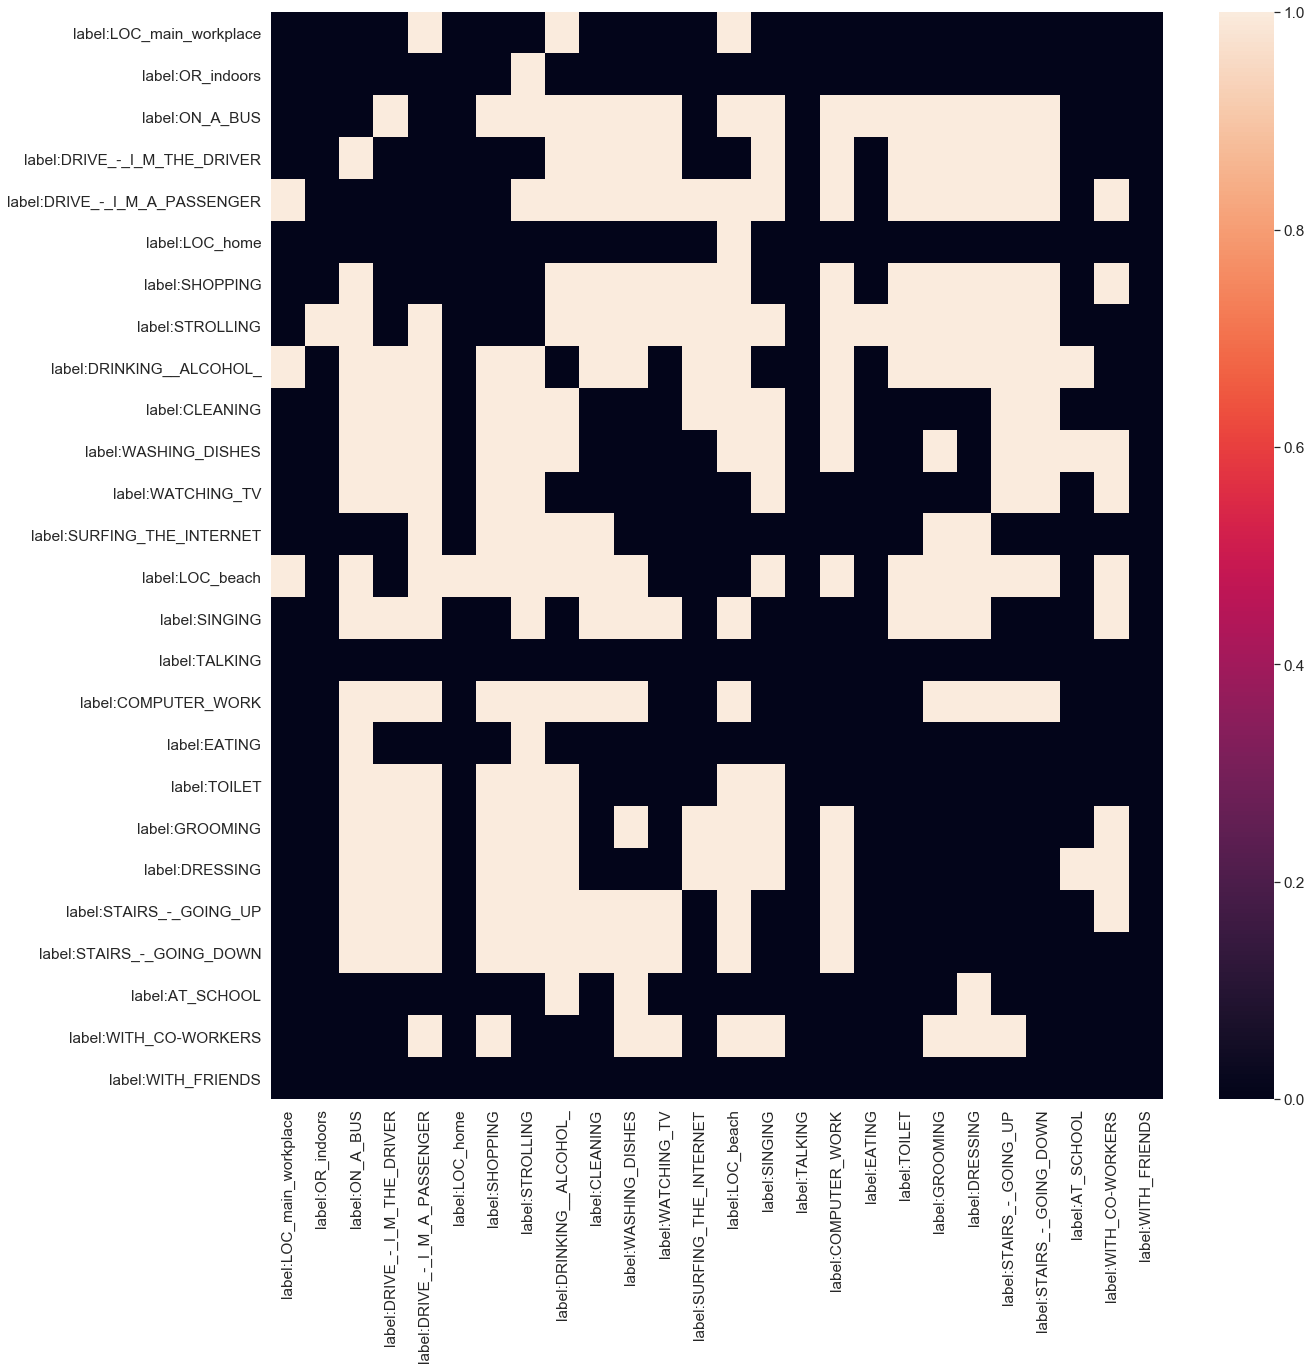

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(mutex, ax=ax, annot_kws={"size": 16})

